# Convolutional Neural Network Project

#### For the course Complete Tensorflow 2 and Keras Deeplearning Bootcamp

We will use the Fashion MNIST dataset and build a image classifier with Keras and Convolutional Neural Network. This dataset includes 10 labels of different clothing types with 28x28 grayscale images. There is a training set of 60000 images and 10000 test images.


    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


In [1]:
# Imports

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
# Load the data from keras.dataset

from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

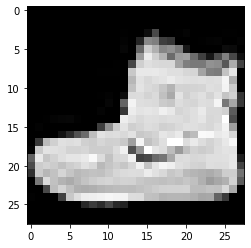

In [4]:
# Let´s visualize some image

plt.imshow(x_train[0], cmap="gray");

In [5]:
y_train[0] # 9 is ankle boot

9

In [6]:
# In this case we don´t have a problem with the shape of the images, 
# since each of them are 28x28
x_train.shape

(60000, 28, 28)

In [7]:
# In any other case, we can see the distribution of the dimensions
# and check the mean of the images shape to define a new image_shape for all
# the images

dimension_1 = []
dimension_2 = []
for image in x_train:
    d1, d2 = image.shape
    dimension_1.append(d1)
    dimension_2.append(d2)
    
# sns.jointplot(dimension_1, dimension_2);

print(np.mean(dimension_1))
print(np.mean(dimension_2))

28.0
28.0


## Preprocessing the data

We first need to normalize X train and test data by dividing it by the max value of the image arrays.

In [8]:
max_value = x_train.max()
max_value

255

In [31]:
# Normalizing

x_train = x_train / max_value
x_test = x_test / max_value

In [10]:
# We should reshape the arrays to include a 4 dimension of the single channel 
# 1 color
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [11]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [12]:
# We need to convert the y_train and y_test values to categorical by using 
# one-hot encoding

from tensorflow.keras.utils import to_categorical

y_categorical_train = to_categorical(y_train)
y_categorical_test = to_categorical(y_test)

y_categorical_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Image manipulation

In some cases is a good idea to manipulate the images with rotation, resizing and scaling so the model becomes more robust using images that our original dataset does not have. For this, we can use ImageDataGenerator.

I will show how to use it, but it will not impact in the model.

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(rotation_range=20, # Rotate the image 20 degrees
                                     width_shift_range=0.10, # Shift the pic width by a max of 5%
                                     height_shift_range=0.10, # Shift the pic height by a max of 5%
                                     rescale=1/max_value, # Rescale the image by normalzing it.
                                     shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                                     zoom_range=0.1, # Zoom in by 10% max
                                     horizontal_flip=True, # Allow horizontal flipping
                                     fill_mode='nearest') # Fill in missing pixels with the nearest filled value

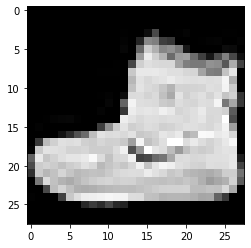

In [14]:
# Example:
plt.imshow(x_train[0], cmap="gray");

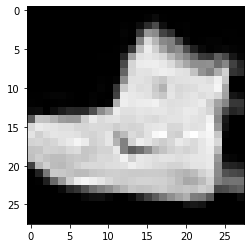

In [15]:
# With the image data generator
plt.imshow(image_generator.random_transform(x_train[0]), cmap="gray");

## Model creation

In [16]:
# Imports for the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
# Creation of the model
model = Sequential()

# One convolutional layer
# Filters by convention are a power of 2. 
# Conventional kernel size's are 3x3, 5x5 and 7x7. Hovewer, we choose 4x4 in this case
# Input shape depends of the shape of the images
# We use relu as activation function
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), 
                 activation="relu"))

# Pooling layer
# Pooling layers are used to reduce the dimensions of the feature maps
# It reduces the number of parameters to learn and the amount of computation performed in the network.
# Increases generalization
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten layer
# Flatten images from 28x28 to 754 before final layer
model.add(Flatten())

# Dense layer (hidden layer)
# A Dense layer with 128 nodes with relu activation function
model.add(Dense(128, activation="relu"))

# Output layer
# We have 10 nodes since we have 10 possible labels/classes
# Softmax is used as the activation function for multi-class classification problems
model.add(Dense(10, activation="softmax"))

# Compilation of the model
# We use categorical_crossentropy as loss function -> is used for
# multi-class classification model where there are two or more output labels.
# We use rmsprop as optimizer -> is a gradient-based optimization technique
# We also ask for the metric accuracy
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", 
              metrics=["accuracy"])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

## Early stopping

In [19]:
# We can add an early stopping 
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=2)

## Training the model

In [35]:
# Using image generator and earlystopping

# history = model.fit(x=image_generator.flow(x_train, y_categorical_train), epochs=10, 
#           validation_data=(x_test, y_categorical_test), callbacks=[early_stop])

history = model.fit(x_train, y_categorical_train, epochs=10, validation_data=(x_test, y_categorical_test), 
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3322 - accuracy: 0.8818 - val_loss: 0.3352 - val_accuracy: 0.8806
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2830 - accuracy: 0.8996 - val_loss: 0.3065 - val_accuracy: 0.8918
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2616 - accuracy: 0.9086 - val_loss: 0.3028 - val_accuracy: 0.8958
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2500 - accuracy: 0.9123 - val_loss: 0.3071 - val_accuracy: 0.8996
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2385 - accuracy: 0.9162 - val_loss: 0.3491 - val_accuracy: 0.8954


In [36]:
losses = pd.DataFrame(history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.332224,0.881800,0.335203,0.8806
1,0.283030,0.899617,0.306464,0.8918
2,0.261564,0.908617,0.302752,0.8958
3,0.250021,0.912300,0.307054,0.8996
4,0.238459,0.916217,0.349064,0.8954


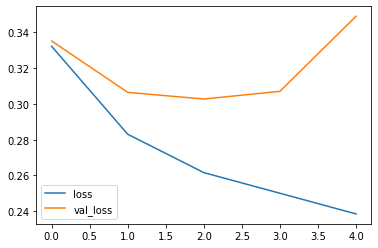

In [37]:
losses[["loss", "val_loss"]].plot();

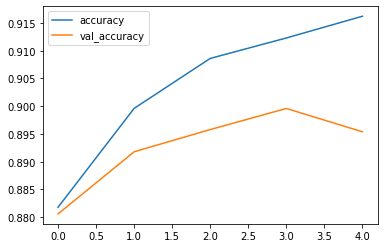

In [38]:
losses[["accuracy", "val_accuracy"]].plot();

In [39]:
from sklearn.metrics import classification_report

predictions = model.predict(x=x_test)
predictions = np.argmax(predictions, axis=1)
predictions

313/313 [==============================] - 1s 4ms/step


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.86      0.83      1000
           3       0.91      0.89      0.90      1000
           4       0.79      0.87      0.83      1000
           5       0.97      0.98      0.97      1000
           6       0.71      0.71      0.71      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

